In [2]:
from pinn_utils import pinn
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


In [26]:
y0 = 0.0
ics = [1.0]
def F(x,y,dy):
    return dy - y
PINN = pinn.PINN(num_hidden_layers=4, input_activation = nn.Softplus(),hidden_activation = nn.Softplus(),layer_width=64)
x_collocation = torch.linspace(-5, 5, 10000).unsqueeze(1).requires_grad_(True)  

In [27]:
solution, checkpoints = pinn.solve(F, y0, ics, PINN, x_collocation, epochs = 10000, print_every=100, return_checkpoints=True)

Epoch 100, Loss: 0.444352, Validation Loss: 0.430265
Epoch 200, Loss: 0.252610, Validation Loss: 0.235558
Epoch 300, Loss: 0.221546, Validation Loss: 0.210044
Epoch 400, Loss: 0.212000, Validation Loss: 0.209497
Epoch 500, Loss: 0.208516, Validation Loss: 0.207938
Epoch 600, Loss: 0.206858, Validation Loss: 0.206109
Epoch 700, Loss: 0.205575, Validation Loss: 0.204452
Epoch 800, Loss: 0.204714, Validation Loss: 0.203376
Epoch 900, Loss: 0.203893, Validation Loss: 0.202358
Epoch 1000, Loss: 0.203281, Validation Loss: 0.201857
Epoch 1100, Loss: 0.202600, Validation Loss: 0.201349
Epoch 1200, Loss: 0.202154, Validation Loss: 0.201210
Epoch 1300, Loss: 0.201495, Validation Loss: 0.200788
Epoch 1400, Loss: 0.201182, Validation Loss: 0.200573
Epoch 1500, Loss: 0.200478, Validation Loss: 0.200150
Epoch 1600, Loss: 0.199639, Validation Loss: 0.199505
Epoch 1700, Loss: 0.197815, Validation Loss: 0.197894
Epoch 1800, Loss: 0.198029, Validation Loss: 0.200249
Epoch 1900, Loss: 0.249362, Validatio

In [28]:
y0 = 0.0
ics = [1.0]
def F(x,y,dy):
    return dy - y
PINN_2 = pinn.PINN(num_hidden_layers=4, hidden_activation = nn.Tanh(),layer_width=64)
x_collocation_2 = torch.linspace(-5, 5, 10000).unsqueeze(1).requires_grad_(True) 

In [29]:
solution_2, checkpoints_2 = pinn.solve(F, y0, ics, PINN_2, x_collocation_2, epochs = 10000, print_every=100, return_checkpoints=True)

Epoch 100, Loss: 0.233220, Validation Loss: 0.253491
Epoch 200, Loss: 0.209764, Validation Loss: 0.236569
Epoch 300, Loss: 0.204050, Validation Loss: 0.231239
Epoch 400, Loss: 0.201705, Validation Loss: 0.228471
Epoch 500, Loss: 0.200335, Validation Loss: 0.226909
Epoch 600, Loss: 0.201873, Validation Loss: 0.225916
Epoch 700, Loss: 0.198473, Validation Loss: 0.225250
Epoch 800, Loss: 0.201796, Validation Loss: 0.224831
Epoch 900, Loss: 0.197266, Validation Loss: 0.224431
Epoch 1000, Loss: 0.196755, Validation Loss: 0.224082
Epoch 1100, Loss: 0.197938, Validation Loss: 0.224021
Epoch 1200, Loss: 0.196104, Validation Loss: 0.223649
Epoch 1300, Loss: 0.195778, Validation Loss: 0.223406
Epoch 1400, Loss: 0.195484, Validation Loss: 0.223184
Epoch 1500, Loss: 0.195448, Validation Loss: 0.223102
Epoch 1600, Loss: 0.195159, Validation Loss: 0.222919
Epoch 1700, Loss: 0.194935, Validation Loss: 0.222708
Epoch 1800, Loss: 0.194713, Validation Loss: 0.222478
Epoch 1900, Loss: 0.194702, Validatio

In [30]:
len(checkpoints)

500

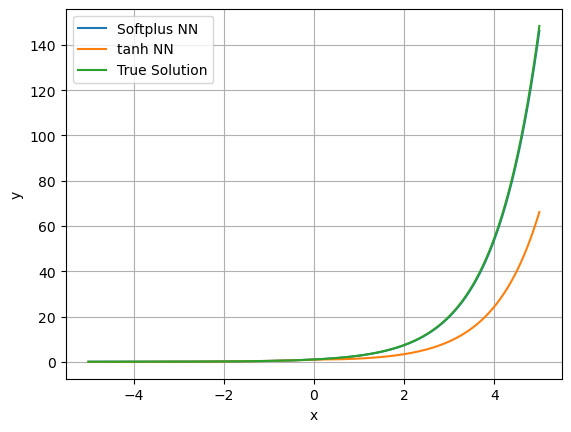

MSE Softplus: 0.21254847943782806, MSE Tanh: 338.4961853027344


In [ ]:
x_np = x_collocation.detach().numpy()
y_1_np = solution(x_collocation).detach().numpy()
y_2_np = solution_2(x_collocation_2).detach().numpy()
y_true = np.exp(x_np)
plt.plot(x_np, y_1_np, label="Softplus NN")
plt.plot(x_np, y_2_np, label="tanh NN")
# plt.plot(x_np,y_true, label= "True Solution")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()
mse_relu = np.mean((y_1_np - y_true)**2)
mse_tanh = np.mean((y_2_np - y_true)**2)
print(f"MSE Softplus: {mse_relu}, MSE Tanh: {mse_tanh}")

In [6]:
y_1 = checkpoints[1][1](x_collocation).numpy()

In [7]:
y_2 = checkpoints[10][1](x_collocation).numpy()

In [8]:
np.allclose(y_1,y_2)

False

In [12]:
y = checkpoints[-1][1](x_collocation).detach().numpy()
y_t = solution(x_collocation).detach().numpy()

In [13]:
np.allclose(y,y_t)

True

In [15]:
(y == y_t).min()

np.True_